In [1]:
library(tidyverse)
library(data.table)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




In [2]:
data <- data.frame(fread('RA_ATAC_heritability.csv'))

In [3]:
data

Category,Prop._SNPs,Prop._h2,Prop._h2_std_error,Enrichment,Enrichment_std_error,Enrichment_p,Coefficient,Coefficient_std_error,Coefficient_z.score
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
baseL2_0,1.000000000,1.000000000,0.00000000,1.0000000,0.0000000,NA,-1.60e-08,4.19e-08,-0.38131186
Coding_UCSCL2_0,0.014259140,0.066344047,0.04151161,4.6527383,2.9112284,2.112571e-01,5.82e-07,3.87e-07,1.50140276
Coding_UCSC.flanking.500L2_0,0.049362884,0.122890432,0.05391216,2.4895311,1.0921598,1.686967e-01,1.08e-07,1.09e-07,0.98916227
Conserved_LindbladTohL2_0,0.024670538,0.021862108,0.06350145,0.8861626,2.5739791,9.646283e-01,-3.09e-07,3.34e-07,-0.92531156
Conserved_LindbladToh.flanking.500L2_0,0.305531357,0.466254589,0.10251920,1.5260450,0.3355440,1.221461e-01,-3.37e-08,5.32e-08,-0.63430576
CTCF_HoffmanL2_0,0.023814664,0.003411036,0.06067537,0.1432326,2.5478155,7.374208e-01,-2.48e-07,2.21e-07,-1.12088679
CTCF_Hoffman.flanking.500L2_0,0.046979790,0.005075825,0.08059073,0.1080427,1.7154340,5.966223e-01,-8.28e-08,1.45e-07,-0.56986234
DGF_ENCODEL2_0,0.135362603,0.543526971,0.14765863,4.0153407,1.0908377,5.532349e-03,2.33e-07,1.33e-07,1.74807374
DGF_ENCODE.flanking.500L2_0,0.402860920,0.291827376,0.15357992,0.7243874,0.3812232,4.643819e-01,3.66e-08,4.99e-08,0.73405925


In [4]:
dim(data)

[1] 103  10

In [5]:
data[98:103,]

,Category,Prop._SNPs,Prop._h2,Prop._h2_std_error,Enrichment,Enrichment_std_error,Enrichment_p,Coefficient,Coefficient_std_error,Coefficient_z.score
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
98,T0L2_1,0.004574949,0.03807368,0.03308994,8.322209,7.232855,0.313936332,-1.93e-06,1.23e-06,-1.5746953
99,T1L2_1,0.008482243,0.15845957,0.04061225,18.681328,4.787914,0.000518836,-7.23e-07,9.34e-07,-0.7735557
100,T20L2_1,0.004452993,0.05999788,0.03294751,13.473606,7.398957,0.099180025,-1.11e-06,1.29e-06,-0.8649324
101,T24L2_1,0.004301680,0.13057403,0.04487890,30.354192,10.432877,0.007045635,2.47e-06,1.42e-06,1.7445938
102,T2L2_1,0.003330728,0.02870167,0.02658273,8.617235,7.981056,0.342317706,-2.06e-06,1.19e-06,-1.7326395
103,T4L2_1,0.008144725,0.25761935,0.04889998,31.630209,6.003884,0.000006180,3.88e-06,1.02e-06,3.8144238


In [6]:
used_data <- data[98:103,c(3,4,5,6)]

In [7]:
names(used_data) <- c('h2','h2_error','enrichment','enrichment_error')
used_data$label <- c('0 min','1 hrs','20 mins','24 hrs','2 hrs','4 hrs')


In [8]:
used_data

,h2,h2_error,enrichment,enrichment_error,label
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
98,0.03807368,0.03308994,8.322209,7.232855,0 min
99,0.15845957,0.04061225,18.681328,4.787914,1 hrs
100,0.05999788,0.03294751,13.473606,7.398957,20 mins
101,0.13057403,0.04487890,30.354192,10.432877,24 hrs
102,0.02870167,0.02658273,8.617235,7.981056,2 hrs
103,0.25761935,0.04889998,31.630209,6.003884,4 hrs


In [9]:
data_forplot <- data.frame(x=c(used_data$label, used_data$label), y=c(used_data$h2, used_data$enrichment), 
                           error=c(used_data$h2_error, used_data$enrichment_error),
                          category=rep(c('Heritability','Enrichment'), each=6))
data_forplot$x <- factor(data_forplot$x, levels=c('0 min','20 mins', '1 hrs','2 hrs','4 hrs','24 hrs'))

Saving 6.67 x 6.67 in image



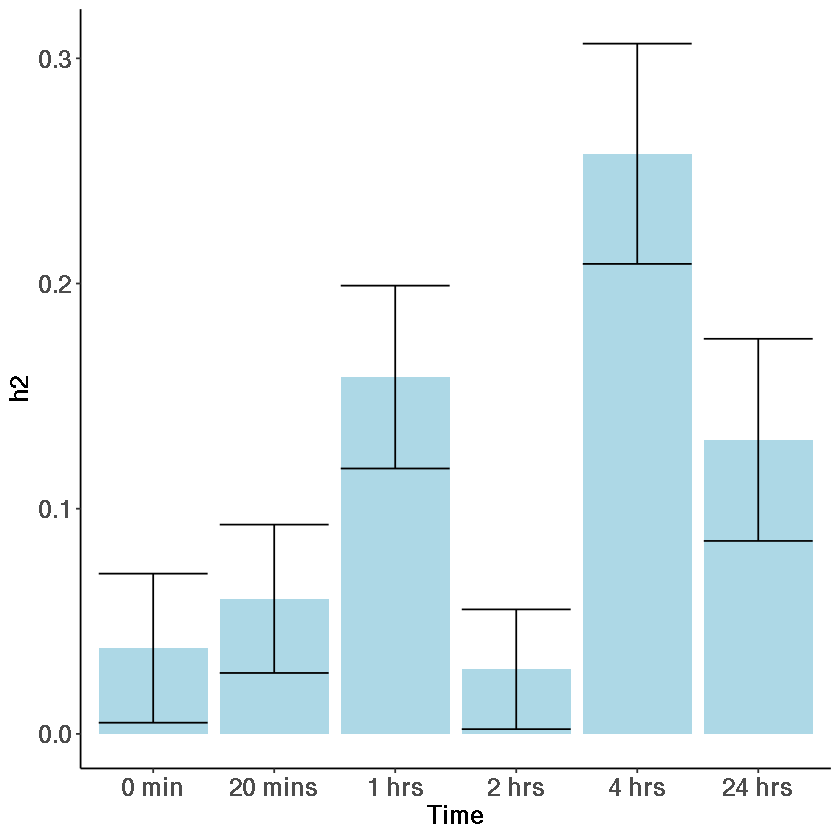

In [12]:
p1 <- ggplot(data=subset(data_forplot, data_forplot$category %in% 'Heritability'), aes(x=x,y=y)) + geom_col(fill='lightblue') + 
geom_errorbar(aes(ymin= y-error, ymax=y+error)) + xlab('Time') + ylab('h2') +
theme(panel.background=element_blank(),plot.title = element_text(hjust = 0.5, face='bold', size=16),
         axis.title=element_text(size=16,face="bold"), axis.text.x=element_text(size=14, face='bold', hjust=0.5), 
         axis.text.y=element_text(size=14, face='bold'),axis.line=element_line('black'),strip.text.x=element_blank(), strip.text.y=element_blank(), legend.position="none") 
p1
ggsave('../../../IntegratingATAC-RNA-HiC/Individual_Figures_Files/Supp_fig12/Heritability.pdf',p1)

Saving 6.67 x 6.67 in image



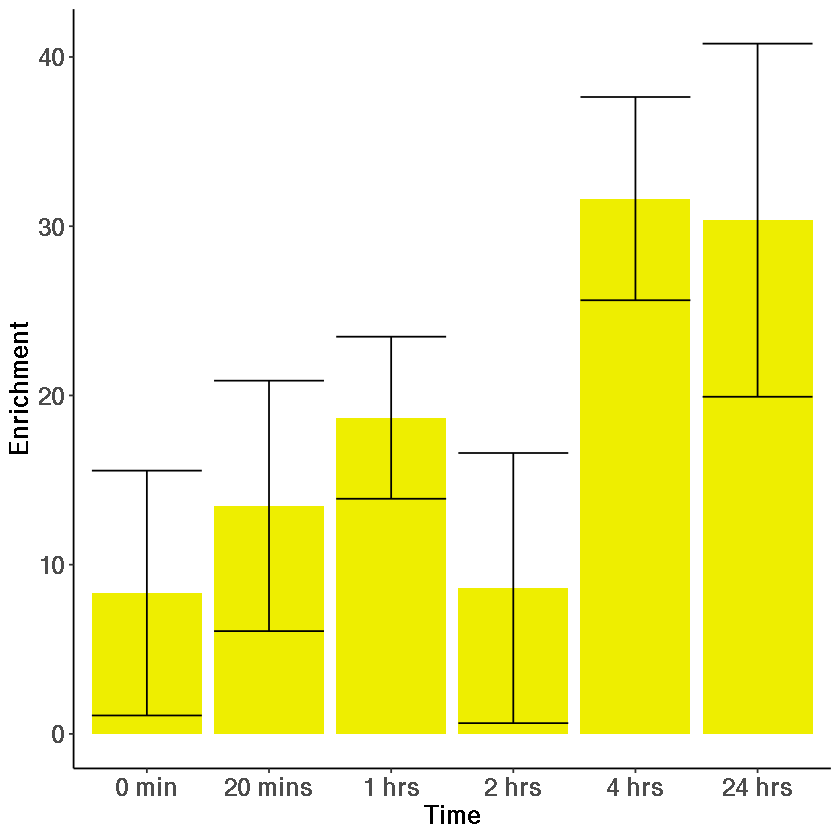

In [11]:
p2 <- ggplot(data=subset(data_forplot, data_forplot$category %in% 'Enrichment'), aes(x=x,y=y)) + geom_col(fill='yellow2') + 
geom_errorbar(aes(ymin= y-error, ymax=y+error)) + xlab('Time') + ylab('Enrichment') +
theme(panel.background=element_blank(),plot.title = element_text(hjust = 0.5, face='bold', size=16),
         axis.title=element_text(size=16,face="bold"), axis.text.x=element_text(size=14, face='bold', hjust=0.5), 
         axis.text.y=element_text(size=14, face='bold'),axis.line=element_line('black'),strip.text.x=element_blank(), strip.text.y=element_blank(), legend.position="none") 
p2
ggsave('../../../IntegratingATAC-RNA-HiC/Individual_Figures_Files/Supp_fig12/Enrichment.pdf',p2)